# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from solution import pr_curve, sr_curve

# Plot functions

In [19]:
def plot_pr_curve(y_true: np.ndarray, y_prob: np.ndarray, conf: float = 0.95, n_bootstrap: int = 10_000):
    recall, precision, precision_lcb, precision_ucb = pr_curve(y_true, y_prob, conf, n_bootstrap)

    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.fill_between(recall, precision_lcb, precision_ucb, color='gray', alpha=0.2, label=f'{int(conf*100)}% CI')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()


def plot_sr_curve(y_true: np.ndarray, y_prob: np.ndarray, conf: float = 0.95, n_bootstrap: int = 10_000):
    specificity, recall, specificity_lcb, specificity_ucb = sr_curve(y_true, y_prob, conf, n_bootstrap)

    plt.figure(figsize=(6, 4))
    plt.plot(specificity, recall, label='Sensitivity-Specificity curve')
    plt.fill_betweenx(recall[::-1], specificity_lcb, specificity_ucb, color='gray', alpha=0.2, label=f'{int(conf*100)}% CI')
    plt.ylabel('Sensitivity')
    plt.xlabel('Specificity')
    plt.title('Sensitivity-Specificity curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

# Test dataset

In [14]:
# Create a binary classification dataset
X, y = make_classification(n_samples=5000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=42)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict the probabilities of the test set
y_prob = clf.predict_proba(X_test)[:, 1]  # take the probability of the positive class

In [15]:
desc_prob_indices = np.argsort(y_prob, kind="mergesort")[::-1]
y_prob = y_prob[desc_prob_indices]
y_test = y_test[desc_prob_indices]

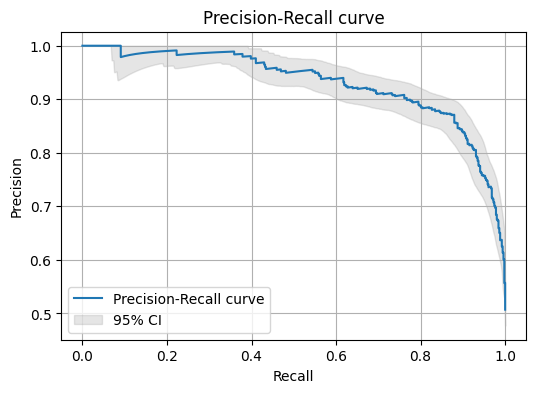

In [20]:
plot_pr_curve(y_test, y_prob)

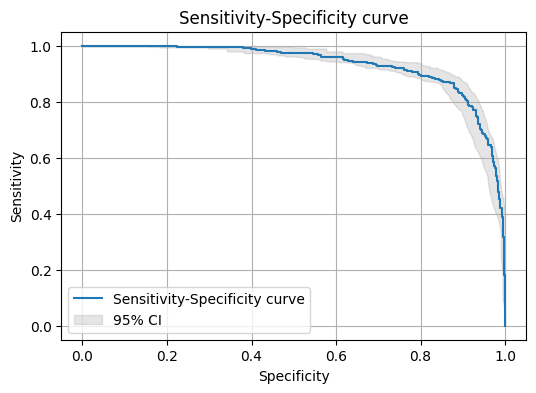

In [21]:
plot_sr_curve(y_test, y_prob)

## Let's try less data

In [22]:
# Create a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=42)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Logistic Regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict the probabilities of the test set
y_prob = clf.predict_proba(X_test)[:, 1]  # take the probability of the positive class

In [23]:
desc_prob_indices = np.argsort(y_prob, kind="mergesort")[::-1]
y_prob = y_prob[desc_prob_indices]
y_test = y_test[desc_prob_indices]

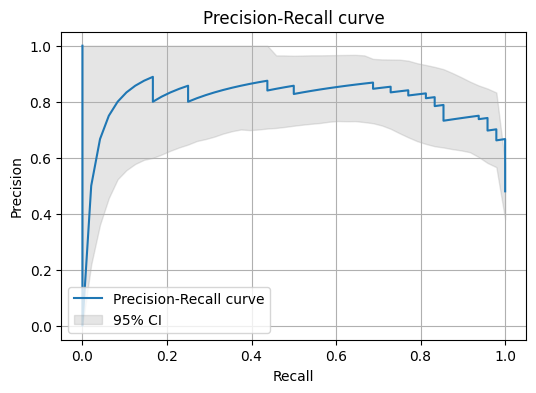

In [24]:
plot_pr_curve(y_test, y_prob)

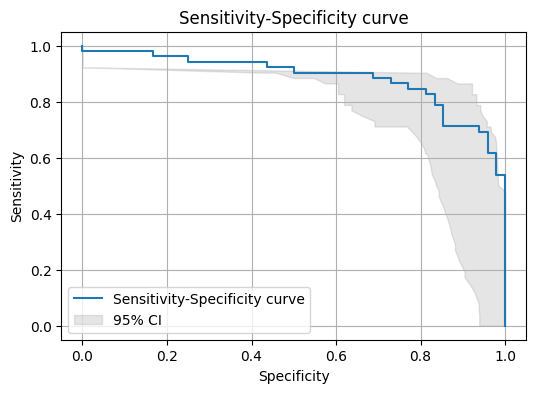

In [25]:
plot_sr_curve(y_test, y_prob)